In [7]:
import requests
import json
import os
import modules.config as config
from time import sleep
from requests.auth import HTTPBasicAuth
from ibm_watson import DiscoveryV1
from pprint import pprint
import modules.discovery_helper as dh_help
import modules.common_helper as cm_help
import sys
import pandas as pd
import modules.config as config
import math
import re
import hashlib
import unicodedata
from bs4 import BeautifulSoup 
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [8]:
all_params = cm_help.get_params()
# COLLECTION_NAME = config.DISCOVERY_COLLECTION_NAME
# print(COLLECTION_NAME)

In [9]:
def discovery_init(COLLECTION_NAME=config.DISCOVERY_COLLECTION_NAME,default=all_params['discovery']['default']):
    response = {}
    
    discovery_param = all_params['discovery']
    # default = 
    authenticator = IAMAuthenticator(apikey=discovery_param[default]['apikey'])
    endurl = "https://gateway.watsonplatform.net/discovery/api"
    discovery = DiscoveryV1(
        version=discovery_param[default]['version'],
        authenticator = authenticator)
    iam_apikey=discovery_param[default]['apikey'],
    url=discovery_param[default]['url']    
    if default =="r3":
        discovery.set_service_url(discovery_param[default]['url'])

    environments = discovery.list_environments().get_result()
    # print(json.dumps(environments, indent=2))
    print("Discovery instance loaded "+default)
    js = json.dumps(environments)
    jres = json.loads(js)
    # print(jres['environments'][1]['environment_id'])
    env_id = jres['environments'][1]['environment_id']
    collections = discovery.list_collections(env_id).get_result()
    cols = json.dumps(collections, indent=2)
    colres = json.loads(cols)

    #print(colres['collections'])
    for item in colres['collections']:
        if item['name']== COLLECTION_NAME:
            print('COLLECTION ID:', item['collection_id'], 'COLLECTION NAME:', item['name'])
            col_id = item['collection_id']
    response['env_id'] = env_id
    response['col_id'] = col_id
    response['discovery'] = discovery
    return response

In [10]:
discovery_config = discovery_init(COLLECTION_NAME='Naviga1',default="r3")

Discovery instance loaded r3
COLLECTION ID: ec586f27-f848-40b7-99af-dab80a43b248 COLLECTION NAME: Naviga1


# Getting 50 Passages 

In [11]:
import pandas as pd

In [19]:
offset = 0
count = 1
reqparams = {'offset':offset,'count':count}
reqparams['q'] = 'Last Dance'
discovery_data_subCode = dh.getDiscoveryData(discovery_config,reqparams)

offset in query = 0


In [20]:
len(discovery_data_subCode["results"])

1

In [21]:
doc_id=[]
passage_score=[]
passage=[]
for i in range(len(discovery_data_subCode["passages"])):
    doc_id.append(discovery_data_subCode["passages"][i]["document_id"])
    passage_score.append(discovery_data_subCode["passages"][i]["passage_score"])
    passage.append(discovery_data_subCode["passages"][i]["passage_text"])

In [22]:
df=pd.DataFrame(doc_id,columns=["Doc_id"])
df["Passage_score"]=passage_score

In [23]:
df['Passage']=passage

In [24]:
provider_name=[]
provider_code=[]
publication_time=[]
for j in range(50):
    reqparams = {'offset':offset,'count':count}
    reqparams['filters']='id::'+doc_id[j]
    discovery_data2 = dh.getDiscoveryData(discovery_config,reqparams)
    provider_name.append(discovery_data2["results"][0]["providerName"])
    provider_code.append(discovery_data2["results"][0]["providerCode"])
    publication_time.append(discovery_data2["results"][0]["publicationTime"])

offset in query = 0
offset in query = 0
offset in query = 0
offset in query = 0
offset in query = 0
offset in query = 0
offset in query = 0
offset in query = 0
offset in query = 0
offset in query = 0


IndexError: list index out of range

In [25]:
df["Provider_Name"]=provider_name
df["Provider_code"]=provider_code
df["Publication_time"]=publication_time

In [26]:
df

,Doc_id,Passage_score,Passage,Provider_Name,Provider_code,Publication_time
0,03a09a1c-cd3d-4561-9086-6933b7a19386,38.995676,"AHS sal speech: If it's the last dance, dance ...",NewsBank,8105,2020-05-23T00:00:00-04:00
1,50602105-0b9c-42f9-9bd7-01641652a2ba,35.628047,Tune In Tonight: Little League reruns and more...,NewsBank,8105,2020-05-28T00:00:00-04:00
2,788ed57f-834f-4e5b-949f-7ccddf1d76b5,35.628047,Tune In Tonight: Little League reruns and more...,NewsBank,8105,2020-05-28T00:00:00-04:00
3,03a09a1c-cd3d-4561-9086-6933b7a19386,29.287775,Sidney Irwin is salutatorian of Abilene High S...,NewsBank,8105,2020-05-23T00:00:00-04:00
4,03a09a1c-cd3d-4561-9086-6933b7a19386,28.668416,AMX:Story Lead=Sidney Irwin is salutatorian of...,NewsBank,8105,2020-05-23T00:00:00-04:00
5,50602105-0b9c-42f9-9bd7-01641652a2ba,28.374070,"In other sports programming, ABC continues to ...",NewsBank,8105,2020-05-28T00:00:00-04:00
6,788ed57f-834f-4e5b-949f-7ccddf1d76b5,28.374070,"In other sports programming, ABC continues to ...",NewsBank,8105,2020-05-28T00:00:00-04:00
7,675cac1e-3c73-4c1d-84b3-5a09eb2ce9d2,27.719066,She danced all four of her high-school years a...,NewsBank,8105,2020-06-03T00:00:00-04:00
8,03a09a1c-cd3d-4561-9086-6933b7a19386,26.763679,"</p>\n\n<p>So while we're celebrating, while w...",NewsBank,8105,2020-05-23T00:00:00-04:00
9,50602105-0b9c-42f9-9bd7-01641652a2ba,26.754829,NEWSBANK:link=https://www.kenoshanews.com/tune...,NewsBank,8105,2020-05-28T00:00:00-04:00


In [27]:
df_final=df.groupby('Provider_Name',axis=0).sum()

In [28]:
df_final

,Passage_score
Provider_Name,
NewsBank,306.193677


In [30]:
b=df.groupby('Provider_Name',axis=0).count()["Passage_score"].values
b

array([10])

In [123]:
df_final["count"]=b

In [124]:
df_final["Average_score"]=df_final["Passage_score"]/df_final["count"]

In [127]:
df_final.drop("Passage_score",axis=1,inplace=True)

In [128]:
df_final.sort_values("Average_score",ascending=False)

,count,Average_score
Provider_Name,,
NewsBank,40,28.279708
Gale Group,5,26.674719
ContentEngine,2,25.574966
Zinio,2,24.959565
ProQuest Information & Learning,1,24.674097


In [31]:
df_final.index

Index(['NewsBank'], dtype='object', name='Provider_Name')

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

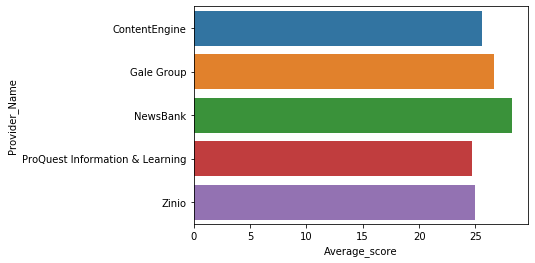

In [138]:
sns.barplot(df_final["Average_score"],df_final.index)

In [135]:
df_final.index

Index(['ContentEngine', 'Gale Group', 'NewsBank',
       'ProQuest Information & Learning', 'Zinio'],
      dtype='object', name='Provider_Name')